In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## 1. Impementing the given image transformation

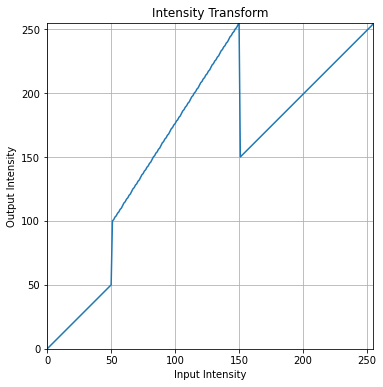

In [2]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
# print(t1)
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
# print(t2)
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
# print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('1_transform.png')
plt.show()

In [3]:
img_orig=cv.imread ('images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. Apply point intensity operations to accentuate,

### 2.1 White matter

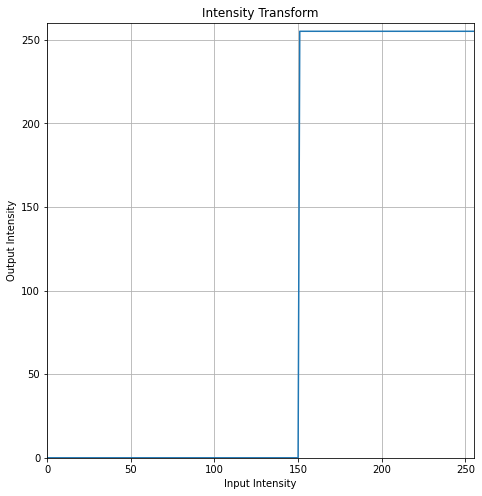

In [4]:
c = np.array([(0,150),(150,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1], 255, 255 - c[1,0]).astype('uint8')
#print(t2)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_1_white_matter_transform.png')
plt.show()

In [5]:
img_orig=cv.imread ('images/ss_brain.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

### 2.2 Gray matter

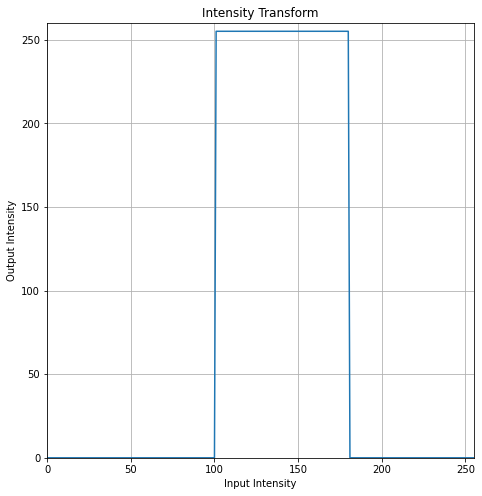

In [6]:
c = np.array([(0,100),(100,255),(180,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1],c[2,1],c[2,0] - c[1,0] ).astype('uint8')
#print(t2)
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')
#print(t3)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_2_gray_matter_transform.png')
plt.show()

In [7]:
img_orig=cv.imread ('images/ss_brain.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 3.

### 3.1 Gamma correction to the L plane

In [10]:
img_orig = cv.imread ('images/ss_gamma_correction.jpg',cv.IMREAD_COLOR)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_orig = cv.cvtColor(img_orig , cv.COLOR_BGR2LAB)

#extract L channel
L_plane = img_orig[:,:,0]

L_plane_gamma = cv.LUT(L_plane, table)
img_gamma = img_orig.copy()
img_gamma[:,:,0] = L_plane_gamma

### 3.2 Histograms of the original and gamma corrected images

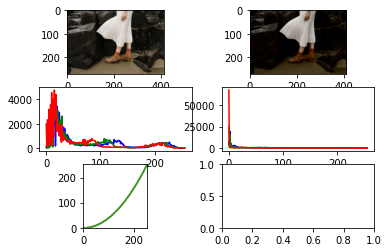

In [11]:
img_orig = cv.cvtColor(img_orig , cv.COLOR_LAB2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)

f,axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)
color=('b','g','r')
for i,c in enumerate(color):
    hist_orig = cv.calcHist([img_orig],[i],None,[256],[0, 256])
    axarr[1,0].plot(hist_orig,color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None,[256],[0, 256])
    axarr[1,1].plot(hist_gamma , color=c)
    axarr[2,0].plot(table)
    axarr[2,0].set_xlim(0,255)
    axarr[2,0].set_ylim(0,255)
    axarr[2,0].set_aspect('equal')

## 4. Aplying an intensity transformation to the saturation plane

In [42]:
# Load the image in BGR color space
image_bgr = cv.imread('images/ss_saturation.jpg', cv.IMREAD_COLOR)

# Convert the BGR image to HSV color space
image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Extract the saturation (S) plane
saturation_plane = image_hsv[:, :, 1]
print(saturation_plane)

# Define the intensity transformation function
def intensity_transform(x, a, sigma=70):
    f_x = np.clip(x+a*np.exp(-(x-128)**2/(2*sigma**2))/128, 0, 255) #.astype(np.uint8)
    return f_x


print(intensity_transform(saturation_plane, 1))

[[31 31 31 ... 28 30 30]
 [31 31 31 ... 33 35 36]
 [30 30 30 ... 44 45 47]
 ...
 [34 36 40 ... 50 50 50]
 [37 38 41 ... 50 50 50]
 [38 39 41 ... 50 50 50]]
[[31.00786288 31.00786288 31.00786288 ... 28.00800619 30.00791198
  30.00791198]
 [31.00786288 31.00786288 31.00786288 ... 33.00796626 35.00785647
  36.00800619]
 [30.00791198 30.00791198 30.00791198 ... 44.0079023  45.00783086
  47.0078886 ]
 ...
 [34.00791198 36.00800619 40.00796707 ... 50.00786048 50.00786048
  50.00786048]
 [37.00794677 38.00788619 41.00790149 ... 50.00786048 50.00786048
  50.00786048]
 [38.00788619 39.00782447 41.00790149 ... 50.00786048 50.00786048
  50.00786048]]


## 5. Histogram Equalization

In [45]:
def histogram_equalization(im):
    """
    Histogram Equalization
    :param img: input image
    :return: histogram equalized image
    """
    img = cv.imread('images/'+im,cv.IMREAD_GRAYSCALE)

    hist,bins = np.histogram(img.ravel(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram for gray scale picture')
    plt.show()
    equ = cv.equalizeHist(img)
    hist,bins = np.histogram(equ.ravel(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(equ.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram of the Equalized Image')
    plt.show()
    res = np.hstack((img,equ)) #stacking images side-by-side    
    plt.axis('off')
    plt.imshow(res,cmap='gray')



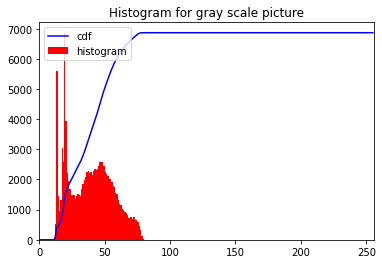

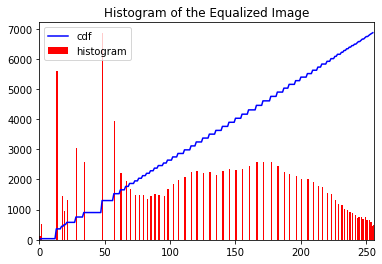

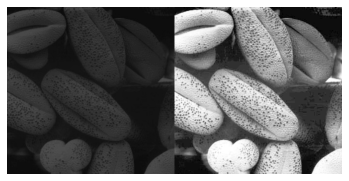

In [47]:
histogram_equalization('ss_histogram.jpg')